# Versuch 256: Röntgenfluoreszenz
## Auswertung von Linus Langenbacher und Ole Wittig, Darwin Korte und Marius Mangold

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

plt.style.use('default')
plt.rcParams["figure.figsize"][0] = 10
plt.rcParams["figure.figsize"][1] = 8
plt.rcParams['errorbar.capsize']=3

sqrt_Er= 0.1185 ,Standardfehler= 0.00031
Er= 0.0140425 , Fehler=  7.347e-05
sig12= 1.3058 ,Standardfehler= 0.09345


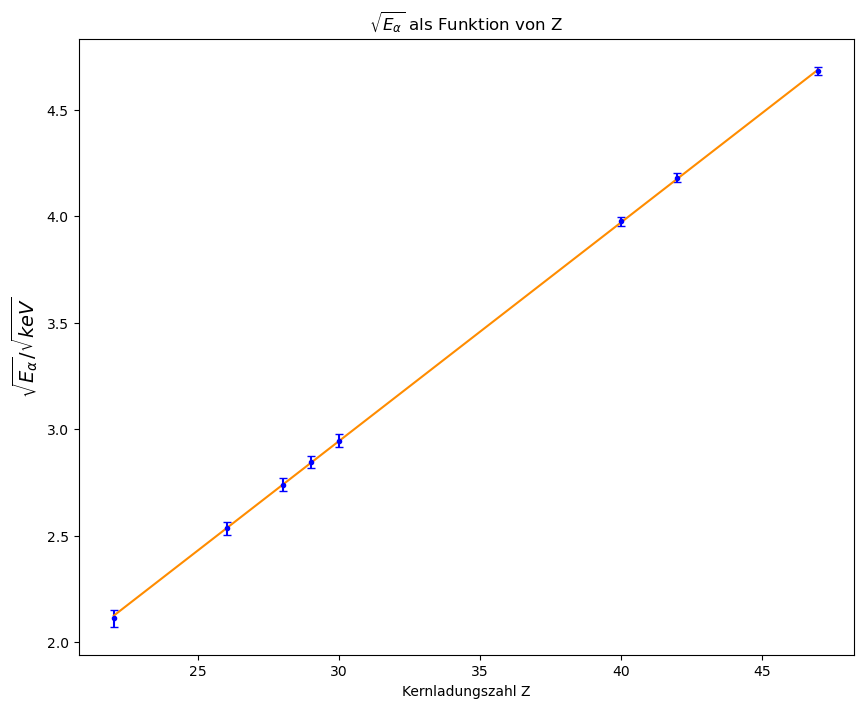

In [2]:
Z=np.array([22,26,28,29,30,40,42,47])
#K_alpha (Ti, Fe, Ni, Cu, Zn, Zr, Mo, Ag) in keV:
K_alpha=np.array([4.46,6.42,7.50,8.09,8.68,15.81,17.48,21.92])
Delta_K_alpha=np.array([0.17,0.15,0.17,0.16,0.18,0.17,0.17,0.19])
sqrt_K_alpha=np.sqrt(K_alpha)
Delta_sqrt_K_alpha= Delta_K_alpha/(2*sqrt_K_alpha)

#sqrt_Er, sig12 sind unsere Fitparameter
n1=1
n2=2
def fit_func(x, sqrt_Er, sig12):
    return sqrt_Er*(x-sig12)*np.sqrt(1/n1**2-1/n2**2)

from scipy.optimize import curve_fit
popt, pcov=curve_fit(fit_func, Z, sqrt_K_alpha, sigma=Delta_sqrt_K_alpha)

plt.errorbar(Z, sqrt_K_alpha, Delta_sqrt_K_alpha, fmt=".", color = "blue")
plt.xlabel('Kernladungszahl Z')
plt.ylabel(r'$\sqrt{E_\alpha}/\sqrt{keV}$ ', fontsize=14)
plt.title(r'$\sqrt{E_\alpha}$' + ' als Funktion von Z')
plt.plot(Z, fit_func(Z,*popt), color= "darkorange")
plt.savefig("K_alpha_Z_fit.pdf", format="pdf")

print("sqrt_Er=",round(popt[0],4), ",Standardfehler=",round(np.sqrt(pcov[0][0]),5))
print("Er=",round(popt[0]**2,7), ", Fehler= ",2*round(popt[0],4)*round(np.sqrt(pcov[0][0]),5))
print("sig12=",round(popt[1], 4), ",Standardfehler=",round(np.sqrt(pcov[1][1]),5))

sqrt_Er_b= 0.1168 , Standardfehler= 0.00016
Er_b= 0.01364 , Fehler=  3.7376e-05
sig12_b= 1.8865 , Standardfehler= 0.04052


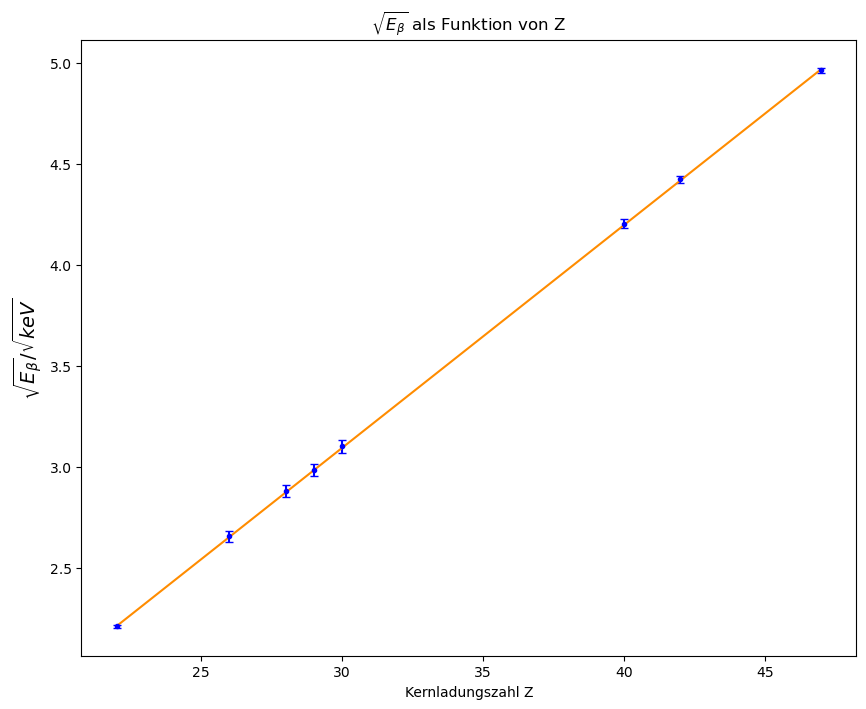

In [3]:
Z=np.array([22,26,28,29,30,40,42,47])
#K_beta (Ti, Fe, Ni, Cu, Zn, Zr, Mo, Ag) in keV:
K_beta=np.array([4.90,7.07,8.30,8.93,9.63,17.68,19.56,24.63])
Delta_K_beta=np.array([0.03,0.15,0.17,0.18,0.19,0.17,0.17,0.12])
sqrt_K_beta=np.sqrt(K_beta)
Delta_sqrt_K_beta= Delta_K_beta/(2*sqrt_K_beta)

#sqrt_Er_b, sig12_b sind unsere Fitparameter
n1_b=1
n2_b=3
def fit_func(x, sqrt_Er_b, sig12_b):
    return sqrt_Er_b*(x-sig12_b)*np.sqrt(1/n1_b**2-1/n2_b**2)

from scipy.optimize import curve_fit
popt, pcov=curve_fit(fit_func, Z, sqrt_K_beta,
sigma=Delta_sqrt_K_beta)

plt.errorbar(Z, sqrt_K_beta, Delta_sqrt_K_beta, fmt=".", color = "blue")
plt.xlabel('Kernladungszahl Z')
plt.ylabel(r'$\sqrt{E_\beta}/\sqrt{keV}$ ', fontsize=14)
plt.title(r'$\sqrt{E_\beta}$' + ' als Funktion von Z')
plt.plot(Z, fit_func(Z,*popt), color= "darkorange")
plt.savefig("K_beta_Z_fit.pdf", format="pdf")

print("sqrt_Er_b=",round(popt[0],4), ", Standardfehler=",round(np.sqrt(pcov[0][0]),5))
print("Er_b=",round(popt[0]**2,5), ", Fehler= ",2*round(popt[0],4)*round(np.sqrt(pcov[0][0]),5))
print("sig12_b=",round(popt[1], 4), ", Standardfehler=",round(np.sqrt(pcov[1][1]),5))